# Time Analysis
This notebook contains an exploration of the timesteps in the longrunmip data.
The notebooks also contains a time override. The models in my study all need to have the same timestamps - year since initialisation. The easiest way to go about this is overriding all time stamps and adding back in new time depending if annual or monthly (ann or monn in file name). 

In [122]:
import cftime

In [123]:
import xarray as xr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import xarray_class_accessors as xca
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [124]:
# The directory where all of the longrun mip data used in this notebook is stored.
ROOT_DIR = '/g/data/w40/ab2313/longrunmip/regrid'

In [125]:
IMG_DIR = '../../images/PhD/init'

# Files

In [128]:
# All the files
files = os.listdir(ROOT_DIR)
files

['tas_ann_HadGEM2_control_239_g025.nc',
 'tas_mon_HadCM3L_control_1000_g025.nc',
 'tas_mon_GFDLCM3_control_5200_g025.nc',
 'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc',
 'tas_mon_GFDLCM3_1pct2x_5000_g025.nc',
 'tas_mon_CCSM3_control_1530_g025.nc',
 'tas_mon_GISSE2R_control_5225_g025.nc',
 'tas_mon_HadCM3L_abrupt2x_1000_g025.nc',
 'tas_mon_ECEARTH_abrupt4x_150_g025.nc',
 'tas_mon_MIROC32_1pct2x_2003_g025.nc',
 'tas_mon_MPIESM12_abrupt2x_999_g025.nc',
 'tas_ann_HadGEM2_abrupt4x_1299_g025.nc',
 'tas_mon_HadCM3L_abrupt6x_1000_g025.nc',
 'tas_ann_MPIESM11_control_2000_g025.nc',
 'tas_ann_FAMOUS_abrupt2x_3000_g025.nc',
 'tas_mon_ECEARTH_rcp85_1271_g025.nc',
 'tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
 'tas_mon_CESM104_abrupt2x_2500_g025.nc',
 'tas_mon_IPSLCM5A_control_1000_g025.nc',
 'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
 'tas_mon_GFDLESM2M_control_1340_g025.nc',
 'tas_mon_ECEARTH_historical_156_g025.nc',
 'tas_mon_MPIESM12_abrupt8x_999_g025.nc',
 'tas_mon_MPIESM12_control_1237_g025.nc',
 

In [129]:
len(files)

54

# Time Stamp Analysis
Looking at the time in each file.

In [130]:
timesteps = []

for i,file in enumerate(files):
    
    
    print(f'{file}: ')
    try:
        data = xr.open_dataset(os.path.join(ROOT_DIR, file))
        print(data.time.values[:6])
        print('Normal')
    except AttributeError:
        try:
            data = xr.open_dataset(os.path.join(ROOT_DIR, file))
            print(data.month.values[:6], '\n', 'month')
        except AttributeError:
            data = xr.open_dataset(os.path.join(ROOT_DIR, file))
            print(data.year.values[:6], '\n', 'year')
    except NameError:
        data = xr.open_dataset(os.path.join(ROOT_DIR, file), use_cftime=True)
        print(data.time.values[:5])
        print('cftime required')

    except:
        print('FAILED')
    
    print('-----------')

    data.close()

tas_ann_HadGEM2_control_239_g025.nc: 
[cftime.Datetime360Day(1860, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1861, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1862, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1863, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1864, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1865, 6, 1, 0, 0, 0, 0, has_year_zero=True)]
Normal
-----------
tas_mon_HadCM3L_control_1000_g025.nc: 
[1.5 2.5 3.5 4.5 5.5 6.5] 
 month
-----------
tas_mon_GFDLCM3_control_5200_g025.nc: 
[cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 5, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 6, 16, 0, 0, 0, 0, has_year_zero=True)]
Normal
-----------
tas

[cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1850, 4, 16, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1850, 5, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1850, 6, 16, 0, 0, 0, 0, has_year_zero=False)]
Normal
-----------
tas_mon_CCSM3_abrupt8x_1450_g025.nc: 
[cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 7, 1, 0, 0, 0, 0, has_year_zero=True)]
Normal
-----------
tas_mon_CCSM3_abrupt2x_3000_g025.nc: 
[cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 

[1.5 2.5 3.5 4.5 5.5 6.5] 
 month
-----------
tas_mon_GFDLESM2M_1pct2x_4500_g025.nc: 
[cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 5, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 6, 16, 0, 0, 0, 0, has_year_zero=True)]
Normal
-----------
tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc: 
[cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 5, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 6, 16, 0, 0, 0, 0, has_year_zero=True)]
Normal
-----------
tas_mon_MIROC32_control_680_g

# Renaming
The timestamp is different between most files. Changing the time to be consistent and start at year 0.

## Demonstation 1

In [131]:
file = f'tas_mon_HadCM3L_control_1000_g025.nc'
file

'tas_mon_HadCM3L_control_1000_g025.nc'

In [132]:
# Opening test file.
tf = xr.open_dataset(os.path.join(ROOT_DIR, file), use_cftime=True)
tf

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, month: 12000)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * month    (month) float64 1.5 2.5 3.5 4.5 ... 1.19e+04 1.19e+04 1.2e+04
Data variables:
    tas      (month, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Aug 23 16:49:13 2016: cdo chname,temp_1,tas tas_HadCM3L...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...

In [133]:
tf.month.values[:15]

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5])

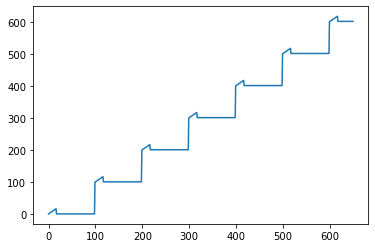

In [134]:
plt.plot(tf.month[:650])

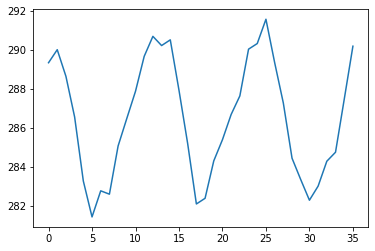

In [135]:
# The timesteps might be completely weird here. But we can see that it is indeed just three years of the 
# annual cycle when plotting for Melbourne. 
sp = tf.sel(lat=-38, lon=144, method='nearest')

plt.plot(sp.tas.values[:36])

In [136]:
# The name of the dim can be different in each file. So need to get the dim that isn't lat or lon.
dims =  np.array(list(tf.dims.keys()))
dims

array(['lon', 'lat', 'month'], dtype='<U5')

In [137]:
~np.isin(dims, ['lon', 'lat', 'long', 'longitude', 'latitude'])

array([False, False,  True])

In [138]:
# This should be the time dim in the dataset.
dim_to_override = dims[~np.isin(dims, ['lon', 'lat', 'long', 'longitude', 'latitude'])][0]
dim_to_override

'month'

In [139]:
# Defining the start of the new time series.
t0 = cftime.DatetimeNoLeap(0, 1, 1, 0, 0, 0, 0, has_year_zero=True)
t0

cftime.DatetimeNoLeap(0, 1, 1, 0, 0, 0, 0, has_year_zero=True)

In [140]:
# Creating new time starting from 0 with length of dataset.
xr.cftime_range(t0, periods = len(tf[dim_to_override].values), freq='M')[:5]

CFTimeIndex([0000-01-31 00:00:00, 0000-02-28 00:00:00, 0000-03-31 00:00:00,
             0000-04-30 00:00:00, 0000-05-31 00:00:00],
            dtype='object', length=5, calendar='noleap', freq='M')

In [141]:
tf[dim_to_override].values[:10]

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5])

In [142]:
tf[dim_to_override] =  xr.cftime_range(t0, periods = len(tf[dim_to_override].values), freq='M')

In [143]:
tf[dim_to_override].values[:5]

array([cftime.DatetimeNoLeap(0, 1, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 3, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 4, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 5, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [144]:
tf = tf.rename({dim_to_override: 'month'})

In [145]:
tf

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, month: 12000)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * month    (month) object 0000-01-31 00:00:00 ... 0999-12-31 00:00:00
Data variables:
    tas      (month, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Aug 23 16:49:13 2016: cdo chname,temp_1,tas tas_HadCM3L...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...

## Loop

In [150]:
# The directory where all of the longrun mip data used in this notebook is stored.
OUTPUT_DIR = '/g/data/w40/ab2313/longrunmip/regrid_retimestamped'

In [151]:
# Defining the start of the new time series.
t0 = cftime.DatetimeNoLeap(0, 1, 1, 0, 0, 0, 0, has_year_zero=True)
t0

cftime.DatetimeNoLeap(0, 1, 1, 0, 0, 0, 0, has_year_zero=True)

In [153]:
for i,file in enumerate(files):

    print(f'- {file} ({i + 1}/{len(files)}): ', end='')
    
    
    #### Opening dataset
    try:
        ds = xr.open_dataset(os.path.join(ROOT_DIR, file), use_cftime=True)
    except:
        # Certain files have an object (string) as the datetime - they will error with cftime.
        ds = xr.open_dataset(os.path.join(ROOT_DIR, file))
        
    
    ### Correcting timesteps
    if 'mon' in file:
        print(' monthly')
        freq = 'M'
        
    else:
        print(' annual')
        freq = 'Y'
        
    # The name of the dim can be different in each file. So need to get the dim that isn't lat or lon.
    dims =  np.array(list(ds.dims.keys()))
    
    # This should be the time dim in the dataset.
    dim_to_override = dims[~np.isin(dims, ['lon', 'lat', 'long', 'longitude', 'latitude'])][0]
    
    new_time = xr.cftime_range(t0, periods = len(ds[dim_to_override].values), freq=freq)
    
    
    print(f'- Time dim is currently: {dim_to_override}')
    print(ds[dim_to_override].values[:5])
    print(ds[dim_to_override].values[-5:])
    print('- New time dim of')
    print(new_time[:2])
    print(new_time[-2:])
    
    ds[dim_to_override] =  new_time
    
    ds = ds.rename({dim_to_override: 'time'})
    
    if 'mon' in file:
        ds = ds.resample(time='Y').mean()
    
    ds.to_netcdf(os.path.join(OUTPUT_DIR, file))
    
    print(ds)
    
    print('------------------\n\n\n\n')
    

- tas_ann_HadGEM2_control_239_g025.nc (1/54):  annual
- Time dim is currently: time
[cftime.Datetime360Day(1860, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1861, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1862, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1863, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(1864, 6, 1, 0, 0, 0, 0, has_year_zero=True)]
[cftime.Datetime360Day(2094, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2095, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2096, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2097, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2098, 6, 1, 0, 0, 0, 0, has_year_zero=True)]
- New time dim of
CFTimeIndex([0000-12-31 00:00:00, 0001-12-31 00:00:00],
            dtype='object', length=2, calendar='noleap', freq=None)
CFTimeIndex([0237-12-31 00:00:00, 0238-12-31 00:00:00],
            dtype='object', length=2, calendar

<xarray.Dataset>
Dimensions:  (time: 5225, lat: 72, lon: 144)
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    tas      (time, lat, lon) float32 225.4 225.3 225.2 ... 254.8 254.9 254.9
------------------




- tas_mon_HadCM3L_abrupt2x_1000_g025.nc (8/54):  monthly
- Time dim is currently: month
[1.5 2.5 3.5 4.5 5.5]
[11901.5 11901.5 11901.5 11901.5 12000.5]
- New time dim of
CFTimeIndex([0000-01-31 00:00:00, 0000-02-28 00:00:00],
            dtype='object', length=2, calendar='noleap', freq=None)
CFTimeIndex([0999-11-30 00:00:00, 0999-12-31 00:00:00],
            dtype='object', length=2, calendar='noleap', freq=None)
<xarray.Dataset>
Dimensions:  (time: 1000, lon: 144, lat: 72)
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0999-12-31 00:00:00
  * lon      (l

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, time: 2000)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0000-12-31 00:00:00 ... 1999-12-31 00:00:00
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Wed Nov 16 02:50:22 2016: cdo remapbil,mygrid tas_ann_MPIES...
    source:       ECHAM6
    institution:  Max-Planck-Institute for Meteorology
    NCO:          4.0.6
    CDO:          Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/...
------------------




- tas_ann_FAMOUS_abrupt2x_3000_g025.nc (15/54):  annual
- Time dim is currently: time
[cftime.Datetime360Day(5002, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(5003, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.Dat

<xarray.Dataset>
Dimensions:  (time: 100, lon: 144, lat: 72)
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0099-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    tas      (time, lat, lon) float32 228.7 228.4 228.4 ... 254.9 255.0 255.0
------------------




- tas_mon_GFDLESM2M_control_1340_g025.nc (21/54):  monthly
- Time dim is currently: time
[cftime.DatetimeNoLeap(161, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(161, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(161, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(161, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(161, 5, 16, 12, 0, 0, 0, has_year_zero=True)]
[cftime.DatetimeNoLeap(1500, 8, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1500, 9, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.Datetim

<xarray.Dataset>
Dimensions:  (time: 1450, lon: 144, lat: 72)
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1449-12-31 00:00:00
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    tas      (time, lat, lon) float32 238.0 237.6 237.6 ... 275.5 275.5 275.5
------------------




- tas_mon_CCSM3_abrupt2x_3000_g025.nc (27/54):  monthly
- Time dim is currently: time
[cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1, 6, 1, 0, 0, 0, 0, has_year_zero=True)]
[cftime.DatetimeNoLeap(3000, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(3000, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(3000, 11, 1, 0

<xarray.Dataset>
Dimensions:    (lon: 144, lat: 72, time: 3000, bnds: 2)
Coordinates:
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height     float32 ...
  * time       (time) object 0000-12-31 00:00:00 ... 2999-12-31 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Thu Feb 16 21:42:48 2017: cdo remapbil,mygrid tas_FAMOUS_co...
    source:       Data from Met Office Unified Model run XJVJM
    CDO:          Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/...
------------------




- tas_mon_CCSM3_abrupt4x_2120_g025.nc (33/54):  monthly
- Time dim is currently: time
[cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftim

- tas_mon_MIROC32_1pct4x_2002_g025.nc (39/54):  monthly
- Time dim is currently: time
[cftime.DatetimeProlepticGregorian(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1, 5, 16, 12, 0, 0, 0, has_year_zero=True)]
[cftime.DatetimeProlepticGregorian(2002, 8, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2002, 9, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2002, 10, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2002, 11, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2002, 12, 16, 12, 0, 0, 0, has_year_zero=True)]
- New time dim of
CFTimeIndex([0000-01-31 00:00:00, 0000-02-28 00:00:00],
            dtype='object', length=2, calend

<xarray.Dataset>
Dimensions:    (lon: 144, lat: 72, time: 3000, bnds: 2)
Coordinates:
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height     float32 ...
  * time       (time) object 0000-12-31 00:00:00 ... 2999-12-31 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Thu Feb 16 21:42:45 2017: cdo remapbil,mygrid tas_FAMOUS_ab...
    source:       Data from Met Office Unified Model run XJVJN
    CDO:          Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/...
------------------




- tas_mon_HadCM3L_abrupt4x_1000_g025.nc (45/54):  monthly
- Time dim is currently: month
[1.5 2.5 3.5 4.5 5.5]
[11901.5 11901.5 11901.5 11901.5 12000.5]
- N

- tas_mon_MPIESM12_abrupt16x_999_g025.nc (51/54):  monthly
- Time dim is currently: time
[cftime.DatetimeProlepticGregorian(1850, 1, 31, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1850, 2, 28, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1850, 3, 31, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1850, 4, 30, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1850, 5, 31, 23, 52, 0, 0, has_year_zero=True)]
[cftime.DatetimeProlepticGregorian(2849, 8, 31, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2849, 9, 30, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2849, 10, 31, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2849, 11, 30, 23, 52, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2849, 12, 31, 23, 52, 0, 0, has_year_zero=True)]
- New time dim of
CFTimeIndex([0000-01-31 00:00:00, 0000-02-28 00:00:00],
            

# Case Analysis
Exploring the different cases that are in the longrinmi data.

## year

In [ ]:
b = xr.open_dataset(os.path.join(ROOT_DIR, 'tas_ann_GFDLESM2M_control_150_g025.nc'))
b

In [ ]:
b.year.values

## Monthly

In [ ]:
a = xr.open_dataset(os.path.join(ROOT_DIR, 'tas_mon_HadCM3L_abrupt2x_1000_g025.nc'))
a

In [ ]:
plt.plot(a.month.values[:300])

In [ ]:
print(*a.month.values[:30])

In [ ]:
print(*a.month.values[-30:])